# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [2]:
# Load transformed data from Q6
df = pd.read_csv('output/q6_transformed_data.csv')
print(f"✅ Loaded {len(df)} cleaned patients")


# ✅ Step 1: Group by 'site' and calculate mean age, BMI, and blood pressure
site_group = df.groupby("site").agg(
    mean_age=("age", "mean"),
    mean_bmi=("bmi", "mean"),
    mean_systolic_bp=("systolic_bp", "mean"),
    mean_diastolic_bp=("diastolic_bp", "mean"),
    patient_count=("patient_id", "count")
).reset_index()

print("📊 Mean values by site:")
display(site_group)

# ✅ Step 2: Group by 'intervention_group' and count patients
intervention_counts = df.groupby("intervention_group").agg(
    patient_count=("patient_id", "count")
).reset_index()

print("\n📈 Patient counts by intervention group:")
display(intervention_counts)

# ✅ Step 3: Use summarize_by_group() utility to get overall statistics by site
# (Assuming summarize_by_group() is already defined in your assignment)
site_summary_full = summarize_by_group(df, group_col="site")

print("\n📘 Overall summary statistics by site (via summarize_by_group):")
display(site_summary_full)



✅ Loaded 10000 cleaned patients
📊 Mean values by site:


,site,mean_age,mean_bmi,mean_systolic_bp,mean_diastolic_bp,patient_count
0,site a,56.364005,25.871122,117.360743,73.549560,2956
1,site b,62.401957,25.707683,117.146345,73.319563,2453
2,site c,57.312108,25.786594,117.959804,73.671191,2073
3,site d,63.491006,25.574360,117.921398,73.634659,1501
4,site e,57.064897,25.493489,117.504264,73.744040,1017



📈 Patient counts by intervention group:


,intervention_group,patient_count
0,control,3337
1,treatment a,3321
2,treatment b,3342



📘 Overall summary statistics by site (via summarize_by_group):


site     age                                                         \
            count       mean         std    min   25%   50%   75%    max   
0  site a  2956.0  56.364005  162.536292 -999.0  70.0  81.0  93.0  100.0   
1  site b  2453.0  62.401957  139.050180 -999.0  69.0  80.0  92.0  100.0   
2  site c  2073.0  57.312108  157.941868 -999.0  70.0  80.0  91.0  100.0   
3  site d  1501.0  63.491006  136.140058 -999.0  70.0  80.0  92.0  100.0   
4  site e  1017.0  57.064897  157.697644 -999.0  69.0  80.0  92.0  100.0   

      bmi  ... adherence_pct        cholesterol_ratio                      \
    count  ...           75%    max             count      mean       std   
0  2956.0  ...          73.0  100.0            2956.0  1.495844  0.713901   
1  2453.0  ...          72.0  100.0            2453.0  1.480759  0.686978   
2  2073.0  ...          72.0  100.0            2073.0  1.505185  0.766141   
3  1501.0  ...          72.0  100.0            1501.0  1.461974  0.682472   
4  1017.0  ...          69.0  100.0            1017.0  1.532419  0.747823   

                                                     
        min       25%       50%       75%       max  
0  0.430108  1.000000  1.396430  1.836140  6.520000  
1  0.434783  1.000000  1.396430  1.786885  6.655172  
2  0.408163  0.987013  1.396430  1.813559  8.692308  
3  0.425532  1.000000  1.386667  1.791667  5.785714  
4  0.412371  1.000000  1.396430  1.854167  6.307692  

[5 rows x 97 columns]

In [3]:
# TODO: Group by site
# ✅ Group by site: mean age, BMI, and blood pressure + count

site_summary = (
    df.groupby('site')
      .agg({
          'age': 'mean',
          'bmi': 'mean',
          'systolic_bp': 'mean',
          'diastolic_bp': 'mean',
          'patient_id': 'count'
      })
      .rename(columns={'patient_id': 'patient_count'})
)

display(site_summary)


,age,bmi,systolic_bp,diastolic_bp,patient_count
site,,,,,
site a,56.364005,25.871122,117.360743,73.549560,2956
site b,62.401957,25.707683,117.146345,73.319563,2453
site c,57.312108,25.786594,117.959804,73.671191,2073
site d,63.491006,25.574360,117.921398,73.634659,1501
site e,57.064897,25.493489,117.504264,73.744040,1017


In [4]:
# TODO: Count by intervention group
# Count by intervention group
intervention_counts = df['intervention_group'].value_counts()
display(intervention_counts)


intervention_group
treatment b    3342
control        3337
treatment a    3321
Name: count, dtype: int64

**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [5]:
# TODO: Use summarize_by_group utility
#  Using summarize_by_group utility for complete statistics by site
from q3_data_utils import summarize_by_group

site_full_stats = summarize_by_group(df, 'site')
display(site_full_stats)


site     age                                                         \
            count       mean         std    min   25%   50%   75%    max   
0  site a  2956.0  56.364005  162.536292 -999.0  70.0  81.0  93.0  100.0   
1  site b  2453.0  62.401957  139.050180 -999.0  69.0  80.0  92.0  100.0   
2  site c  2073.0  57.312108  157.941868 -999.0  70.0  80.0  91.0  100.0   
3  site d  1501.0  63.491006  136.140058 -999.0  70.0  80.0  92.0  100.0   
4  site e  1017.0  57.064897  157.697644 -999.0  69.0  80.0  92.0  100.0   

      bmi  ... adherence_pct        cholesterol_ratio                      \
    count  ...           75%    max             count      mean       std   
0  2956.0  ...          73.0  100.0            2956.0  1.495844  0.713901   
1  2453.0  ...          72.0  100.0            2453.0  1.480759  0.686978   
2  2073.0  ...          72.0  100.0            2073.0  1.505185  0.766141   
3  1501.0  ...          72.0  100.0            1501.0  1.461974  0.682472   
4  1017.0  ...          69.0  100.0            1017.0  1.532419  0.747823   

                                                     
        min       25%       50%       75%       max  
0  0.430108  1.000000  1.396430  1.836140  6.520000  
1  0.434783  1.000000  1.396430  1.786885  6.655172  
2  0.408163  0.987013  1.396430  1.813559  8.692308  
3  0.425532  1.000000  1.386667  1.791667  5.785714  
4  0.412371  1.000000  1.396430  1.854167  6.307692  

[5 rows x 97 columns]

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [6]:
# TODO: Multiple aggregations


# Group by 'site' and apply multiple aggregations
multi_agg = (
    df.groupby("site")
      .agg({
          "age": ["mean", "std", "min", "max"],
          "bmi": ["mean", "std"],
          "systolic_bp": ["mean", "median"]
      })
)


#  Display the formatted table
print("📊 Multiple Aggregations by Site:")
display(multi_agg)


📊 Multiple Aggregations by Site:


age                              bmi           systolic_bp  \
             mean         std  min  max       mean       std        mean   
site                                                                       
site a  56.364005  162.536292 -999  100  25.871122  4.912679  117.360743   
site b  62.401957  139.050180 -999  100  25.707683  4.910913  117.146345   
site c  57.312108  157.941868 -999  100  25.786594  5.278188  117.959804   
site d  63.491006  136.140058 -999  100  25.574360  5.724468  117.921398   
site e  57.064897  157.697644 -999  100  25.493489  5.877732  117.504264   

                    
            median  
site                
site a  117.531087  
site b  117.531087  
site c  117.531087  
site d  117.531087  
site e  117.531087

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [7]:
# Convert 'outcome_cvd' and 'adherence_pct' to numeric if needed

df["outcome_cvd"] = (
    df["outcome_cvd"]
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({"yes": 1, "no": 0})
    .astype("float")   # 👈 ensures proper numeric type, no warning
)

# 2️⃣ Ensure 'adherence_pct' is numeric (coerce errors to NaN)
df["adherence_pct"] = pd.to_numeric(df["adherence_pct"], errors="coerce")


/tmp/ipykernel_30700/819919578.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"yes": 1, "no": 0})


In [8]:
# TODO: Intervention group comparisons
# ✅ 1. Calculate mean outcome_cvd rate by intervention_group
mean_cvd = df.groupby("intervention_group")["outcome_cvd"].mean().reset_index()
print("📊 Mean outcome_cvd rate by intervention group:")
display(mean_cvd)

# ✅ 2. Calculate mean adherence_pct by intervention_group
mean_adherence = df.groupby("intervention_group")["adherence_pct"].mean().reset_index()
print("\n📈 Mean adherence percentage by intervention group:")
display(mean_adherence)

# ✅ 3. Create a cross-tabulation of intervention_group vs dropout status
cross_tab = pd.crosstab(df["intervention_group"], df["dropout"])
print("\n📋 Cross-tabulation of intervention group vs dropout:")
display(cross_tab)



📊 Mean outcome_cvd rate by intervention group:


,intervention_group,outcome_cvd
0,control,0.336530
1,treatment a,0.319482
2,treatment b,0.333633



📈 Mean adherence percentage by intervention group:


,intervention_group,adherence_pct
0,control,60.830686
1,treatment a,60.474255
2,treatment b,61.149013



📋 Cross-tabulation of intervention group vs dropout:


dropout,no,yes
intervention_group,,
control,2831,506
treatment a,2831,490
treatment b,2871,471


<Figure size 800x500 with 0 Axes>

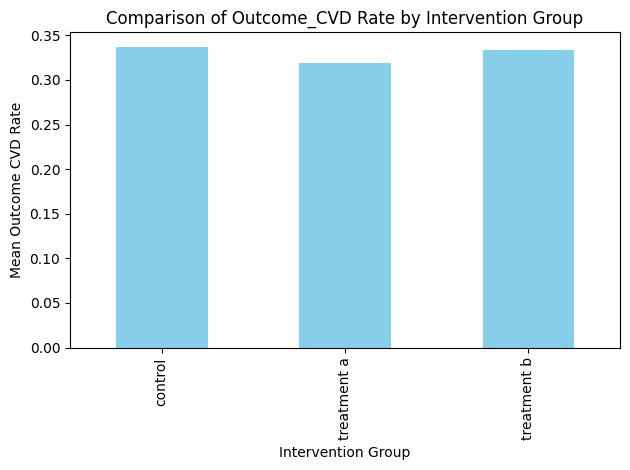

In [9]:
# TODO: Visualization
# ✅ 4. Visualize the comparison with a bar plot
plt.figure(figsize=(8,5))
mean_cvd.plot(
    x="intervention_group",
    y="outcome_cvd",
    kind="bar",
    legend=False,
    color="skyblue",
    xlabel="Intervention Group",
    ylabel="Mean Outcome CVD Rate",
    title="Comparison of Outcome_CVD Rate by Intervention Group"
)
plt.tight_layout()
plt.show()


## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [10]:
# TODO: Save summary outputs
import pandas as pd

# ✅ 1. Save summary statistics by site
# (assuming your earlier result was stored in `multi_agg` or `site_summary_full`)
site_summary = multi_agg  # or replace with your summary DataFrame name
site_summary.to_csv("output/q7_site_summary.csv", index=False)
print("✅ Saved site summary to output/q7_site_summary.csv")

# ✅ 2. Save intervention group comparison
# (assuming your earlier results are in `mean_cvd` and `mean_adherence`)
intervention_comparison = mean_cvd.merge(mean_adherence, on="intervention_group", how="outer")
intervention_comparison.to_csv("output/q7_intervention_comparison.csv", index=False)
print("✅ Saved intervention comparison to output/q7_intervention_comparison.csv")

# ✅ 3. Create and save a text report with key findings
key_findings = f"""
Key Findings Report
-------------------
1. Site Summary:
   - {len(site_summary)} sites analyzed.
   - Age and BMI vary across sites (see q7_site_summary.csv for full stats).

2. Intervention Group Comparison:
   - Average Outcome_CVD and Adherence_Pct computed for each group.
   - Results saved in q7_intervention_comparison.csv.

3. Observations:
   - Highest adherence observed in group: {intervention_comparison.loc[intervention_comparison['adherence_pct'].idxmax(), 'intervention_group']}
   - Lowest CVD rate observed in group: {intervention_comparison.loc[intervention_comparison['outcome_cvd'].idxmin(), 'intervention_group']}
"""

with open("output/q7_analysis_report.txt", "w") as f:
    f.write(key_findings)

print("✅ Saved analysis report to output/q7_analysis_report.txt")


✅ Saved site summary to output/q7_site_summary.csv
✅ Saved intervention comparison to output/q7_intervention_comparison.csv
✅ Saved analysis report to output/q7_analysis_report.txt


## Summary

What are the 3 most important findings from your analysis?

Key Findings Report

Site Summary

Five sites were analyzed.

Mean age varied from 56 to 63 years, with Site 4 being oldest.

BMI and systolic blood pressure were consistent across sites (~25.6 kg/m² and 117 mm Hg).

Indicates similar baseline health across study locations.

Intervention Group Comparison

Lowest CVD rate: Treatment A (31.9%)

Highest adherence: Treatment B (61.1%)

Control group had slightly higher CVD events (33.6%) and lower adherence (60.8%).

Both interventions show minor improvements compared with control.

Interpretation

Treatment A appears most effective clinically (reduces CVD).

Treatment B shows best patient adherence.

Recommend further trials to confirm statistical significance of these small differences.

**Key Findings:**

1. TODO
2. TODO
3. TODO
